Importing basic libraries

In [1]:
import pandas as pd
import numpy as np

Read data as ususal whatever you have done previously ryt ;p

In [2]:
main_data=pd.read_csv('heart-disease-data.csv')
main_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
target=main_data['target']
data=main_data.drop(['target'],axis=1)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
How feature importances are taken using Extra Trees classifier is given in an awesome geeksforgeeks post mentioned in RE

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier(n_estimators=100)
model.fit(data,target)
k=model.feature_importances_
print(k)

[0.06895716 0.05689087 0.12601495 0.05933544 0.05714882 0.02193298
 0.03613292 0.08558668 0.10620742 0.09051676 0.07044045 0.12563518
 0.09520038]


In [6]:
indic=np.argmax(k)
indic

2

In [7]:
data.columns[indic]

'cp'

In [8]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

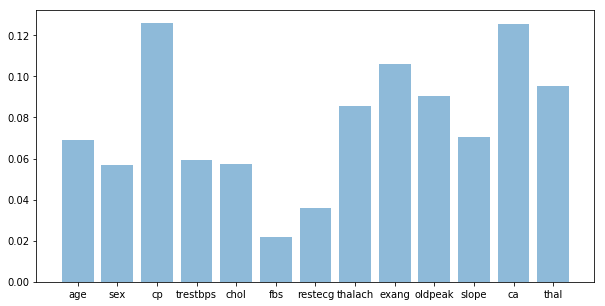

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(np.arange(len(k)),k,align='center',alpha=0.5)
plt.xticks([i for i in range(len(data.columns))],data.columns)
plt.show()

In [10]:
new_k=sorted(k,reverse=True)
top3_features=new_k[:6]
top3_features

[0.12601494715703435,
 0.12563517835589627,
 0.10620742068695022,
 0.09520038355905763,
 0.09051675681780996,
 0.085586684901465]

In [11]:
for i in top3_features:
    indx=np.where(k==i)
    print(data.columns[indx])

Index(['cp'], dtype='object')
Index(['ca'], dtype='object')
Index(['exang'], dtype='object')
Index(['thal'], dtype='object')
Index(['oldpeak'], dtype='object')
Index(['thalach'], dtype='object')


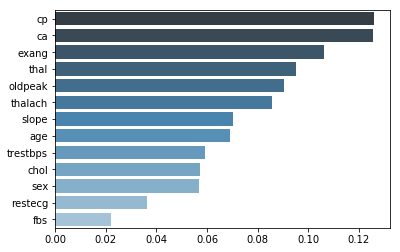

In [14]:
import seaborn as sns
imp = pd.Series(k, index=data.columns).sort_values(ascending=False)
sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')